#### Pre-processing

In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image

main_path= r'C:\Users\hp\Saclay-ai\ML\archive'

data = []
labels = []

for label_name, label_value in [("yes", 1), ("no", 0)]:
    folder = os.path.join(main_path, label_name)

    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)

        img = Image.open(img_path).convert("L")
        img = img.resize((100,100))
        img_array = np.array(img).flatten()
        data.append(img_array)
        labels.append(label_value)

df = pd.DataFrame(data)
df["label"] = labels

df.head()

KeyboardInterrupt: 

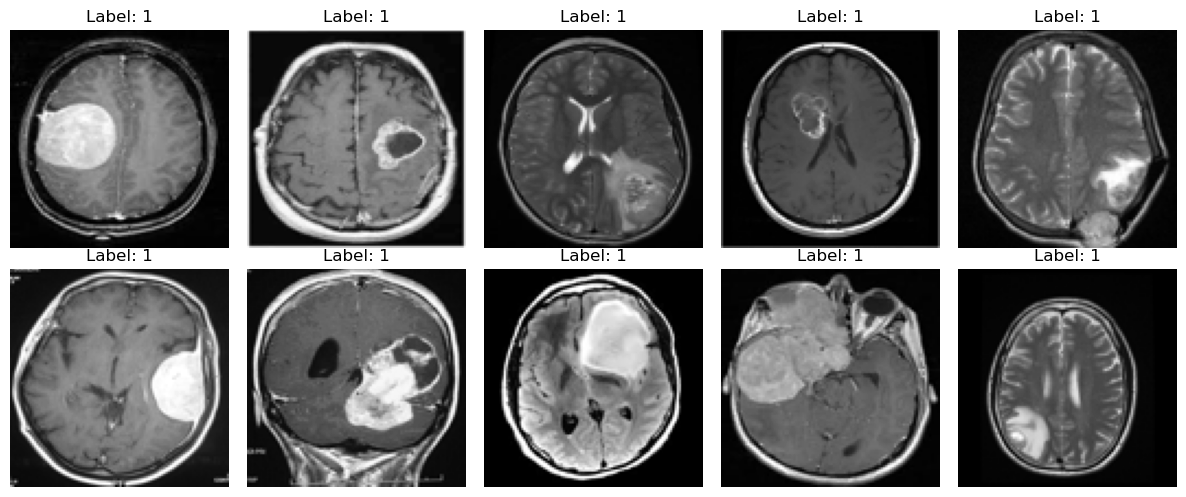

In [ ]:
import matplotlib.pyplot as plt
n_rows, n_cols = 2, 5

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5))

for i in range(10):
    row = df.iloc[i, :-1]
    img_array = np.array(row, dtype=np.uint8)
    img_reshaped = img_array.reshape((100, 100))  

    ax = axes[i // n_cols, i % n_cols]  

    ax.imshow(img_reshaped, cmap='gray')
    ax.set_title(f"Label: {df.iloc[i, -1]}")
    ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
df.dtypes

0        uint8
1        uint8
2        uint8
3        uint8
4        uint8
         ...  
9996     uint8
9997     uint8
9998     uint8
9999     uint8
label    int64
Length: 10001, dtype: object

In [ ]:
df.isnull().values.any()

False

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X, y = df.drop(columns="label"), df["label"]

x_train, x_test, y_train, t_test = train_test_split(X, y, test_size=0.2, random_state=2)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#### K-means

In [ ]:
from sklearn.cluster import KMeans

# Compute the mean vector for each class (assuming binary classes: 0 and 1)
mean_class_0 = x_train[y_train == 0].mean(axis=0)
mean_class_1 = x_train[y_train == 1].mean(axis=0)

# Stack them to form the init centers
init_centroids = np.vstack([mean_class_0, mean_class_1])

kmeans = KMeans(n_clusters=2, init=init_centroids, n_init=1, random_state=42)
kmeans.fit(x_train)

kmeans.inertia_

NameError: name 'x_train' is not defined

Cluster 0


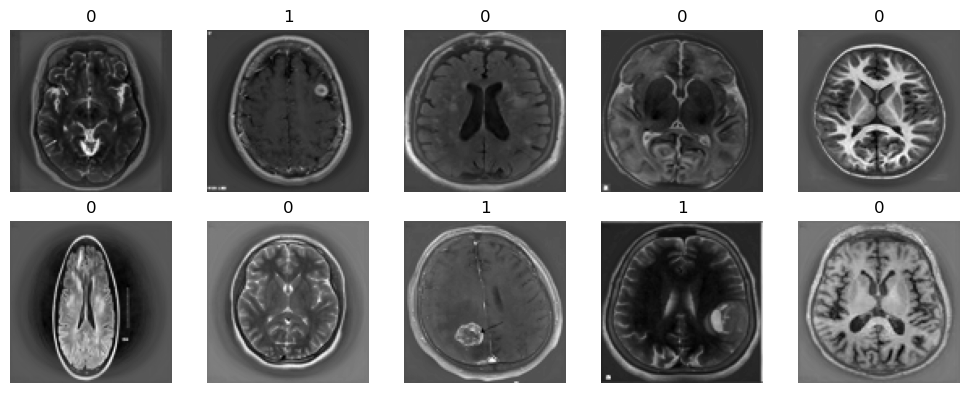

Cluster 1


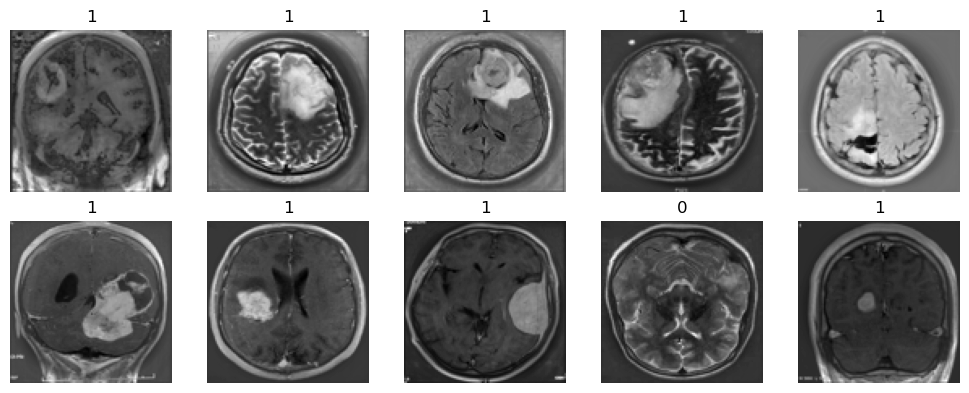

In [ ]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 100, 100)  # reshape each flat image to 64x64
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols * 2, n_rows * 2))  # adjusted figure size
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(f"{label}")
    plt.tight_layout()
    plt.show()

# Visualize clusters
for cluster_id in np.unique(kmean.labels_):
    print("Cluster", cluster_id)
    in_cluster = kmean.labels_ == cluster_id
    faces = x_train[in_cluster]
    labels = y_train[in_cluster]  # show true label or cluster ID

    # Optional: show only up to N images per cluster (e.g., first 10)
    N = 10
    faces = faces[:N]
    labels = labels[:N]

    plot_faces(faces, labels)

In [ ]:
from sklearn.metrics import accuracy_score

kmeans_labels = kmean.predict(x_test)

acc = accuracy_score(t_test, kmeans_labels)
acc_flipped = accuracy_score(t_test, 1-kmeans_labels)

max(acc, acc_flipped)

0.5882352941176471